        City  Temperature (°C)  Humidity (%)          Weather
0      Delhi             29.37            78  overcast clouds
1     Mumbai             27.39            78  overcast clouds
2    Kolkata             27.88            81       few clouds
3    Chennai             28.11            82  overcast clouds
4  Bengaluru             20.89            88  overcast clouds


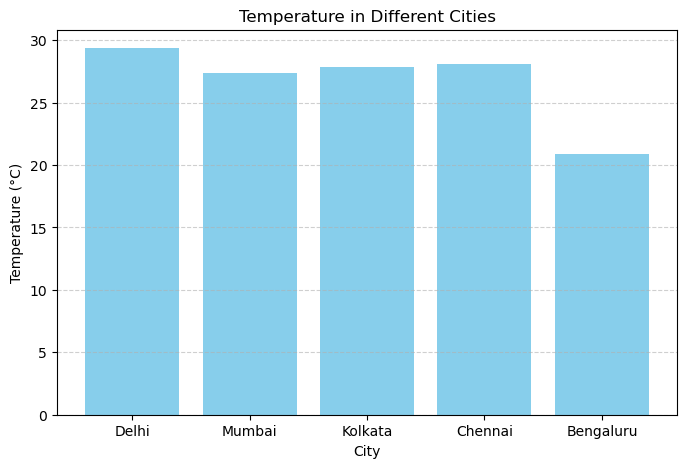

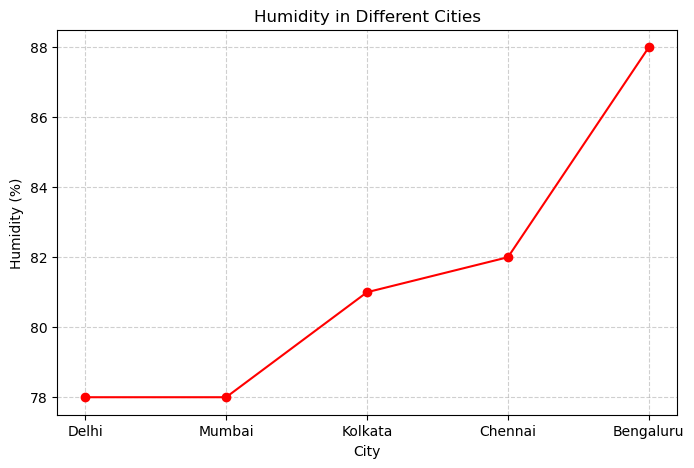

In [4]:

# api_key = '5344c5937f5e4f23b7e143159a6f512e'
# 33b1cf8599f7181ba5ddfd1913a9dad2

import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = "33b1cf8599f7181ba5ddfd1913a9dad2" 
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru"]

weather_data = []

for city in cities:
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    # Check if API returned success
    if data.get("cod") == 200:
        weather_data.append({
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"],
            "Weather": data["weather"][0]["description"]
        })
    else:
        print(f"Error fetching data for {city}: {data.get('message')}")

# Only proceed if we have data
if weather_data:
    df = pd.DataFrame(weather_data)
    print(df)

    # Temperature Plot
    plt.figure(figsize=(8, 5))
    plt.bar(df["City"], df["Temperature (°C)"], color="skyblue")
    plt.title("Temperature in Different Cities")
    plt.xlabel("City")
    plt.ylabel("Temperature (°C)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

    # Humidity Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df["City"], df["Humidity (%)"], marker="o", color="red")
    plt.title("Humidity in Different Cities")
    plt.xlabel("City")
    plt.ylabel("Humidity (%)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()
else:
    print("No data to display.")
